# Checkpoint 2 - EDA

In [1]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
import os, numpy, scipy, statistics, matplotlib.pyplot as plt, IPython.display as ipd
from IPython.display import Audio
import pandas as pd
from scipy.stats import mode
import json
import IPython.display as ipd

In [18]:
def load(indir=None,outdir=None): 
    songs = os.listdir(indir)
    y_array = []
    sr_array = []
    song_name = []
    for i in songs:
        if '.DS_Store' in i: 
            continue
        y, sr = librosa.load(indir+'/'+ i)
        y_array.append(y)
        sr_array.append(sr)
        song_name.append(i)
    
    
    df = pd.DataFrame({'Name': song_name,
                       'y': y_array,
                       'sr': sr_array})
    #df.to_csv(os.path.join(outdir,r'loaded_data.csv',index=False))
    #df.to_json(os.path.join(outdir,r'loaded_data.txt'))
    
    return df

In [6]:
loaded = load('data/raw','data')

/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [2]:
def return_main_notes(chromagram):
    total_occurences_above_8 = []
    notes = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']

    for i in chromagram: 
        count = 0
        for j in i: 
            if j >=0.7: 
                count+=1
        total_occurences_above_8.append(count)
        
    df = pd.DataFrame({'occurences above 0.8':total_occurences_above_8,'notes':notes})
    df = df.sort_values('occurences above 0.8',ascending=False)
    #pitch = df['notes'][0:9]
        
    return df

In [ ]:
#get main 8 notes of each 2 min clip
#store the main 8 notes of each 2 min clip in a dictionary/list 
#average these for each rag
#make a histogram for that rag

#for spectogram: 

#show one spectogram for each rag (whichever is most representative of that rag )

We want to get the note that is being played at each second. if there are multiple notes being played in a one second interval, we want to get the most played note/the one played the longest
after we have a note for each second, we want to do bigram/trigram analysis. we are constraining our data to the most played note per second to reduce noise and to lessen the chance of our function picking up extraneous noise and thinking they are notes.

In [26]:
def get_clean_data(df):
    dfdict = {'songs': [], 'y': [], 'sr': []}
    fmin = librosa.midi_to_hz(36)
    hop_length = 512
    
    audio = list(df['Name'])
    ys = np.asarray(list(df['y']))
    srs = list(df['sr'])
    
    pitchdict = {'Asavari Natabhairavi 1': 'C#', 'Asavari Natabhairavi 2': 'D',
                 'Asavari Natabhairavi 3': 'D',
               'Bhairav Mayamalavagowlai 1': 'C#', 'Bhairav Mayamalavagowlai 2': 'C', 
               'Bhairav Mayamalavagowlai 3': 'C#', 'Bhairavi Hanumatodi 1': 'D',
               'Bhairavi Hanumatodi 2': 'C', 'Bhairavi Hanumatodi 3': 'D#',
               'Bilawal Dheerashankarabharanam 1': 'D', 'Bilawal Dheerashankarabharanam 2': 'D#',
               'Bilawal Dheerashankarabharanam 3': 'E', 'Kafi Karaharapriya 1': 'D',
               'Kafi Karaharapriya 2': 'D', 'Kafi Karaharapriya 3': 'D#',
               "Kalyan Kalyani 1": 'E', "Kalyan Kalyani 2": 'D#', 'Kalyan Kalyani 3': 'D#',
               'Khamaj Harikambhoji 1': 'D', 'Khamaj Harikambhoji 2': 'E', 'Khamaj Harikambhoji 3': 'E',
               'Marva Gamanasharma 1': 'C', 'Marva Gamanasharma 2': 'E', 'Marva Gamanasharma 3': 'D',
               'Poorvi Kamavardhani 1': 'C#', 'Poorvi Kamavardhani 2': 'C#', 'Poorvi Kamavardhani 3': 'C#',
               'Todi Subhapantuvarali 1': 'C', 'Todi Subhapantuvarali 2': 'C#', 'Todi Subhapantuvarali 3': 'D'}
    
    #iterate through input dict
    for i in range(len(df)):
        y = ys[i]
        sr = srs[i]
        
        #check pitch of each input
        #chromagram = librosa.feature.chroma_stft(y, sr=sr, hop_length=hop_length)
        
        pitch = pitchdict[audio[i][:-4]]
        
        if pitch == 'C':
            newy = y
        elif pitch == 'C#':
            newy = librosa.effects.pitch_shift(y, sr, n_steps=-1)
        elif pitch == 'D':
            newy = librosa.effects.pitch_shift(y, sr, n_steps=-2)
        elif pitch == 'D#':
            newy = librosa.effects.pitch_shift(y, sr, n_steps=-3)
        elif pitch == 'E':
            newy = librosa.effects.pitch_shift(y, sr, n_steps=-4)
        elif pitch == 'F':
            newy = librosa.effects.pitch_shift(y, sr, n_steps=-5)
        elif pitch == 'F#':
            newy = librosa.effects.pitch_shift(y, sr, n_steps=-6)
        elif pitch == 'G':
            newy = librosa.effects.pitch_shift(y, sr, n_steps=-7)
        elif pitch == 'G#':
            newy = librosa.effects.pitch_shift(y, sr, n_steps=+4)
        elif pitch == 'A':
            newy = librosa.effects.pitch_shift(y, sr, n_steps=+3)
        elif pitch == 'A#':
            newy = librosa.effects.pitch_shift(y, sr, n_steps=+2)
        elif pitch == 'B':
            newy = librosa.effects.pitch_shift(y, sr, n_steps=+1)
        
        y = newy  
        ylist = []
        first = 0
        second = 10000
        while second < len(y):
            
            ylist.append(y[first:second])
            first = second
            second = second + 10000
            
        cliptitles = []
        
        for j in range(len(ylist)):
            string = audio[i][:-6]
            cliptitles.append(string)
            
        for k in range(len(cliptitles)):
            dfdict['songs'].append(cliptitles[k])
            dfdict['y'].append(ylist[k])

            dfdict['sr'].append(sr)
            
    newdf = pd.DataFrame(dfdict)
    
    return newdf

In [ ]:
def clean_data(indir = None, outdir = None):

    if outdir and not os.path.exists(outdir):
        os.makedirs(outdir)
    df = pd.read_pickle('data/loaded_data.pkl')  
    cleaned = get_clean_data(df)
   
    cleaned.to_pickle(os.path.join(outdir,r'cleaned_data.pkl'))
    
    return cleaned

In [ ]:
x = clean_data(indir='data', outdir='data')

In [ ]:
pd.read_pickle('data/cleaned_data.pkl')

In [ ]:
#trim audio 
#ask about sr to twomey 

/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


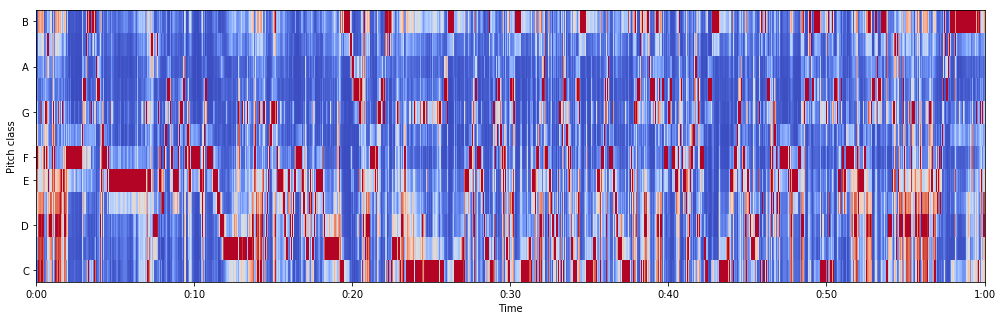

In [3]:
#first two mins of bhairav 2

y, sr = librosa.load('test_data_raw/Bhairav Mayamalavagowlai 2.mp3',offset=180,duration=60)
chromagram = librosa.feature.chroma_stft(y = y, sr=sr, hop_length=512) #n_fft
plt.figure(figsize=(17, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=512, cmap='coolwarm')
#.     C C# E F G G# B C 

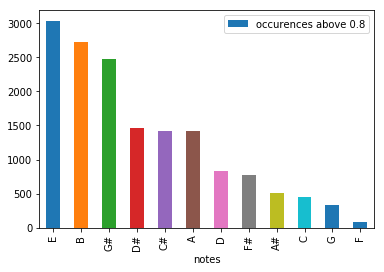

In [53]:
notes = return_main_notes(chromagram)
notes.plot(kind='bar',x='notes',y='occurences above 0.8')

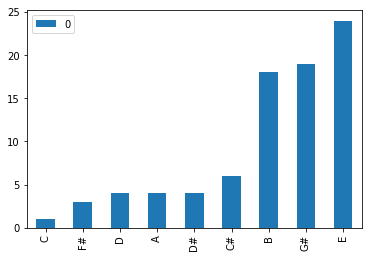

In [54]:
seq_notes = []
max_val = []
for row in chromagram.T:
    seq_notes.append(np.argmax(row))
    max_val.append(np.max(row))
all_notes = pd.Series(seq_notes).apply(numtonote)

values = []
for i in range(0, len(all_notes),86):
    curr = all_notes[i:i+86]
    values.append(mode(curr)[0][0])
#print(values)

newvals = []
for i in range(len(values)):
    if i != 0 and values[i] == values[i-1]:
        continue
    else:
        newvals.append(values[i])
newvals_dict = {}
for i in newvals: 
    if i in newvals_dict: 
        newvals_dict[i] +=1
    else: 
        newvals_dict[i] = 1
pd.DataFrame.from_dict(newvals_dict,orient='index').sort_values(by=0).plot(kind='bar')

In [15]:
notes # C C# E F G G# B C not A F# A# D# D

# D E F# G A B C# 

,occurences above 0.8,notes
0,263,C
1,256,C#
4,226,E
2,172,D
5,153,F
3,126,D#
7,74,G
8,48,G#
10,35,A#
11,34,B


# EDA

In [27]:
def average_dist(df):
    y_list = df['y'] #ys for every clip
    sr_list = df['sr']
    hop_length = 512
    notes = {'C': 0,'C#': 0,'D': 0,'D#': 0,'E': 0,'F': 0,'F#': 0,'G': 0,'G#': 0,'A': 0,'A#': 0,'B': 0}
    global_notecount = 0 
    #goes through all clips
    for i in range(len(y_list)): 
        
        chromagram = librosa.feature.chroma_stft(y = y_list[i], sr=sr_list[i], hop_length=hop_length)
        #plt.figure(figsize=(17, 5))
        #librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=512, cmap='coolwarm')
        
        notecount = 0 #total number of notes we are getting from clip
        counts = [] #final length should be 12
     
        seq_notes = []
        #go through each 1/43rd of a second 
       # print(len(chromagram.T),'chromagram.T should be large number')
        for row in chromagram.T:
            seq_notes.append(np.argmax(row)) #index of note with highest frequency at that 1/43rd of a second
        all_notes = pd.Series(seq_notes).apply(numtonote)
    
        values = []
        for i in range(0, len(all_notes),86):
            curr = all_notes[i:i+86]
            values.append(mode(curr)[0][0])
        notecount = len(values)
        global_notecount += notecount
        
        #add notecount to global dictionary directly
        for i in values:   
            if i in notes:
                notes[i]+=1
            else: 
                notes[i] = 1
        
        #count frequency of each note in values
        #newvals_dict = {}
        #for i in values: 
            #if i in newvals_dict: 
            #    newvals_dict[i] +=1
          #  else: 
             #   newvals_dict[i] = 1
        
        #for n in newvals_dict:
            #notes[n].append(newvals_dict[n]/notecount)

            
    for note in notes:
        #takes average frequency for each note
        #notes[note] = np.mean(notes[note])
        notes[note] = notes[note]/global_notecount
        
    notedf = pd.DataFrame.from_dict(notes, orient = 'index')
    return notedf


def EDA(songs): 
    #input should be list of x songs
    #songs = [song1, song2, song3]
    y_array = []
    sr_array = []
    song_name = []
    for i in songs:
        if '.DS_Store' in i: 
            continue
        y,sr = librosa.load('test_data_raw/'+ i)
        y_array.append(y)
        sr_array.append(sr)
        song_name.append(i)

    df = pd.DataFrame({'Name': song_name,
                       'y': y_array,
                       'sr': sr_array})
    
    cleaned_df = get_clean_data(df)
    
    histogram_df = average_dist(cleaned_df)
    #histogram_df.display()
    #histogram_df = histogram_df.sort_values(by=[0])[:7].sort_index().rename(columns={0:'Notes'})
    #plot = histogram_df.sort_values(by=[0])[:7].sort_index().rename(columns={0:'Notes'}).plot(kind = 'bar', title = 'Songs')
    #plot.set_xlabel("Notes")
    #plot.set_ylabel("Frequency")
    
    return histogram_df

In [24]:
x = EDA(['Bhairav Mayamalavagowlai 1.mp3','Bhairav Mayamalavagowlai 2.mp3','Bhairav Mayamalavagowlai 3.mp3'])

/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


first ys [array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)]
[0. 0. 0. ... 0. 0. 0.] y inside for loop
[0. 0. 0. ... 0. 0. 0.] y inside for loop
[0. 0. 0. ... 0. 0. 0.] y inside for loop
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 

20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be

20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be

/anaconda3/lib/python3.6/site-packages/librosa/core/pitch.py:146: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be

20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be

20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be

20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be

20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be

20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be

20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be

20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be

20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be

20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be

20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be

20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be

20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be

20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be

20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be

20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be

20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be

20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be

20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be

20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be

20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be

20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be

20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be large number
20 chromagram.T should be

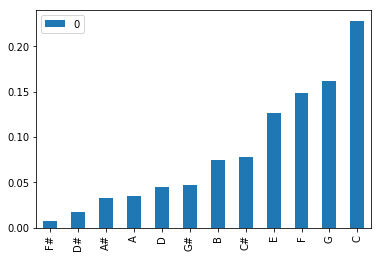

In [25]:
x.sort_values(by=0).plot(kind='bar')

In [28]:
y = EDA(['Kafi Karaharapriya 1.mp3','Kafi Karaharapriya 2.mp3','Kafi Karaharapriya 3.mp3'])

/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/anaconda3/lib/python3.6/site-packages/librosa/core/pitch.py:146: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


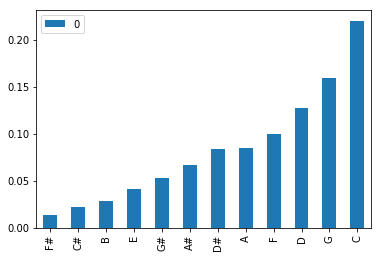

In [31]:
y.sort_values(by=0).plot(kind='bar')

In [32]:
z = EDA(['Marva Gamanasharma 1.mp3','Marva Gamanasharma 2.mp3','Marva Gamanasharma 3.mp3'])

/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/anaconda3/lib/python3.6/site-packages/librosa/core/pitch.py:146: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


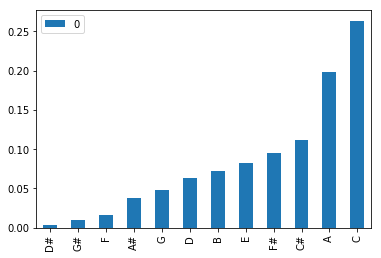

In [33]:
z.sort_values(by=0).plot(kind='bar')

In [ ]:
C C# E F# G A B C

In [10]:
#TRIGRAM BIGRAM

In [3]:
def extract_ngrams(chromagram, num):
    seq_notes = []
    max_val = []
    for row in chromagram.T:
        seq_notes.append(np.argmax(row))
        max_val.append(np.max(row))
    all_notes = pd.Series(seq_notes).apply(numtonote)

    values = []
    for i in range(0, len(all_notes),22):
        curr = all_notes[i:i+22]
        values.append(mode(curr)[0][0])
    #print(values)

    newvals = []
    for i in range(len(values)):
        if i != 0 and values[i] == values[i-1]:
            continue
        else:
            newvals.append(values[i])
    #print(newvals)
        
    
    n_grams = ngrams(newvals, num)
    fdist = nltk.FreqDist(n_grams)
    ngramlist = []
    counts = []
    for k,v in fdist.items():
        ngramlist.append(k)
        counts.append(v)
    clipdict = {ngramlist[i]: counts[i] for i in range(len(ngramlist))}

    return clipdict

In [8]:
from scipy.stats import mode
import nltk 
from nltk.util import ngrams

def numtonote(num):
    if num == 0:
        return 'C'
    if num == 1:
        return 'C#'
    if num == 2:
        return 'D'
    if num == 3:
        return 'D#'
    if num == 4:
        return 'E'
    if num == 5:
        return 'F'
    if num == 6:
        return 'F#'
    if num == 7:
        return 'G'
    if num == 8:
        return 'G#'
    if num == 9:
        return 'A'
    if num == 10:
        return 'A#'
    if num == 11:
        return 'B'


def create_ngrams(songs):
    y_array = []
    sr_array = []
    song_name = []
    for i in songs:
        if '.DS_Store' in i: 
            continue
        y,sr = librosa.load('test_data_raw/'+ i)
        y_array.append(y)
        sr_array.append(sr)
        song_name.append(i)

    df = pd.DataFrame({'Name': song_name,
                       'y': y_array,
                       'sr': sr_array})
    
    cleaned_df = get_clean_data(df)
    #gives us df of clip title (raga name), y, sr
    
    y_list = cleaned_df['y']
    sr_list = cleaned_df['sr']
    
    ragabigrams = {}
    ragatrigrams = {}
    
    for i in range(len(y_list)):
        chromagram = librosa.feature.chroma_stft(y = y_list[i], sr=sr_list[i], hop_length=512)
        if i == 2: 
            plt.figure(figsize=(17, 5))
            librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=512, cmap='coolwarm')
            
        
        #helper function return
        bigramdict = extract_ngrams(chromagram,2)
        for key in bigramdict:
            if key in ragabigrams:
                ragabigrams[key] += bigramdict[key]
                
            else:
                ragabigrams[key] = bigramdict[key]
                
                bigramdict = extract_ngrams(chromagram,2)
        
        trigramdict = extract_ngrams(chromagram,3)
        for key in trigramdict:
            if key in ragatrigrams:
                ragatrigrams[key] += trigramdict[key]
                
            else:
                ragatrigrams[key] = trigramdict[key]
        
        
    #bdf = pd.DataFrame(ragabigrams)
    #tdf = pd.DataFrame(ragatrigrams)
    
    bdf = pd.DataFrame({'Bigrams': list(ragabigrams.keys()), 'Counts': list(ragabigrams.values())})
    plot = bdf.sort_values(by = 'Counts', ascending = False)[:10].plot(kind = 'bar', x= 'Bigrams', y = 'Counts', title = songs[0][:-6]) 
    plot.set_xlabel("Bigrams")
    plot.set_ylabel("Counts")
    
    tdf = pd.DataFrame({'Trigrams': list(ragatrigrams.keys()), 'Counts': list(ragatrigrams.values())})
    plot2 = tdf.sort_values(by = 'Counts', ascending = False)[:10].plot(kind = 'bar', x= 'Trigrams', y = 'Counts', title = songs[0][:-6]) 
    plot2.set_xlabel("Trigrams")
    plot2.set_ylabel("Counts")
    
    
    
    return ipd.Audio(y_list[2],rate=sr_list[2])
def extract_ngrams(chromagram, num):
    seq_notes = []
    max_val = []
    for row in chromagram.T:
        seq_notes.append(np.argmax(row))
        max_val.append(np.max(row))
    all_notes = pd.Series(seq_notes).apply(numtonote)

    values = []
    for i in range(0, len(all_notes),22):
        curr = all_notes[i:i+22]
        values.append(mode(curr)[0][0])
    #print(values)

    newvals = []
    for i in range(len(values)):
        if i != 0 and values[i] == values[i-1]:
            continue
        else:
            newvals.append(values[i])
    #print(newvals)
        
    
    n_grams = ngrams(newvals, num)
    fdist = nltk.FreqDist(n_grams)
    ngramlist = []
    counts = []
    for k,v in fdist.items():
        ngramlist.append(k)
        counts.append(v)
    clipdict = {ngramlist[i]: counts[i] for i in range(len(ngramlist))}

    return clipdict

In [25]:
#returns top 8 notes of audio file you put in 
def find_raga(audio_file):
    frequency_df = EDA(audio_file)
    top_notes = list(frequency_df.index)
    compare_list = []
    
    for i in raga_dict: 
        compare_list.append(len(set(raga_dict[i]) & set(top_notes)))
    
    max_index = np.argmax(compare_list)
    raga_name = list(raga_dict)[max_index]
    print(raga_name,'raga name')
    print(raga_dict[raga_name],'notes')
    return raga_name

In [27]:
bhairav = find_raga(['Bhairav Mayamalavagowlai 1.mp3'])

/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


Asavari


In [61]:
#from our frequency counts (not correct right now) 
raga_dict = {'Asavari': ['A','A#','B','C#','F','F#','G#'],
            'Bilawal': ['A','A#','C#','D','D#','F#','G#'],
            'Bhairav': ['A','A#','C#','D','D#','F#','G#'],
            'Bhairavi': ['B','C#','D#','E','F','F#','G#'],
            'Kafi': ['A','A#','B','C#','E','F#','G#'],
            'Kalyan': ['A','A#','C#','D','D#','F','G#'],
            'Khamaj': ['A','A#','C#','D#','F','F#','G#'],
            'Marwa': ['A#','D','D#','E','F','G','G#'],
            'Poorvi': ['A','A#','C#','D','D#','F','G#'],
            'Todi': ['A','A#','C#','D','F','F#','G#']}
#correct 
raga_dict_official = {'Asavari': ['C','D','D#','F','G','G#','A#','C'],
            'Bilawal': ['C','D','E','F','G','A','B','C'],
            'Bhairav': ['C','C#','E','F','G','G#','B','C'],
            'Bhairavi': ['C','C#','D#','F','G','G#','A#','C'],
            'Kafi': ['C','D','D#','F','G','A','A#','C'],
            'Kalyan': ['C','D','E','F#','G','A','B','C'],
            'Khamaj': ['C','D','E','F','G','A','A#','C'],
            'Marwa': ['C','C#','E','F#','G','A','B','C'],
            'Poorvi': ['C','C#','E','F#','G','G#','B','C'],
            'Todi': ['C','C#','D#','F#','G','G#','B','C']}


In [62]:
def raga_finder_individual_clips(songs):
    y_array = []
    sr_array = []
    song_name = []
    for i in songs:
        if '.DS_Store' in i: 
            continue
        y,sr = librosa.load('test_data_raw/'+ i)
        y_array.append(y)
        sr_array.append(sr)
        song_name.append(i)

    df = pd.DataFrame({'Name': song_name,
                       'y': y_array,
                       'sr': sr_array})
    display(df)
    cleaned_df = get_clean_data(df) 
    y_list = cleaned_df['y']
  #  print(len(y_list),'ylist')
    sr_list = cleaned_df['sr']
    
    raga_list = []
    notes_list = []
    for i in range(len(cleaned_df)):
        
        chromagram = librosa.feature.chroma_stft(y = y_list[i], sr=sr_list[i], hop_length=512)
        top_8 = return_main_notes(chromagram)
        
        #immediately classify that smaller clip 
        compare_list = []

        for i in raga_dict_official: 
            compare_list.append(len(set(raga_dict_official[i]) & set(top_8)))

        max_index = np.argmax(compare_list)
        raga_name = list(raga_dict)[max_index]
        raga_list.append(raga_name)
        notes_list.append(raga_dict_official[raga_name])

    return dict(zip(raga_list, notes_list)) 

In [63]:
#gives back 8 notes 
def return_main_notes(chromagram):
    total_occurences_above_8 = []
    notes = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']

    for i in chromagram: 
        count = 0
        for j in i: 
            if j >=0.7: 
                count+=1
        total_occurences_above_8.append(count)
        
    df = pd.DataFrame({'occurences above 0.8':total_occurences_above_8,'notes':notes})
    df = df.sort_values('occurences above 0.8',ascending=False)
    pitch = df['notes'][0:9]
        
    return pitch

In [64]:
b = raga_finder_individual_clips(['Bhairav Mayamalavagowlai 2.mp3'])

/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


,Name,y,sr
0,Bhairav Mayamalavagowlai 2.mp3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050


first ys [[0. 0. 0. ... 0. 0. 0.]]
[0. 0. 0. ... 0. 0. 0.] y inside for loop


/anaconda3/lib/python3.6/site-packages/librosa/core/pitch.py:146: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


In [65]:
b

{'Bilawal': ['C', 'D', 'E', 'F', 'G', 'A', 'B', 'C'],
 'Asavari': ['C', 'D', 'D#', 'F', 'G', 'G#', 'A#', 'C'],
 'Kafi': ['C', 'D', 'D#', 'F', 'G', 'A', 'A#', 'C'],
 'Bhairav': ['C', 'C#', 'E', 'F', 'G', 'G#', 'B', 'C'],
 'Poorvi': ['C', 'C#', 'E', 'F#', 'G', 'G#', 'B', 'C'],
 'Kalyan': ['C', 'D', 'E', 'F#', 'G', 'A', 'B', 'C'],
 'Todi': ['C', 'C#', 'D#', 'F#', 'G', 'G#', 'B', 'C'],
 'Khamaj': ['C', 'D', 'E', 'F', 'G', 'A', 'A#', 'C']}

In [32]:
#accuracy score

def accuracy_score(predictions,raga): 
    
    acc_score = 0 
    for i in range(len(predictions)): 
        if predictions[i] == raga: 
            acc_score+=1
    return acc_score/len(predictions)

In [33]:
b

{}